In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy import integrate
import matplotlib.colors as mcolors
from tqdm import tqdm

In [2]:
Pi = np.arccos(-1)
def omega(n,r,N,R,a):
    return (1.5*Pi*a**2)**3*n**1.5*(N-n)**1.5*np.exp(-3/(2*a**2)*((r[0]**2+r[1]**2)/n+((R[0]-r[0])**2+(R[1]-r[1])**2)/(N-n)))
def Omega(r,N,R,a):
    if norm(r) + norm(R-r)>N*a:
        return 0.
    nmin = int(norm(r)/a)
    nmax = int(N-norm(R-r)/a)
    return sum([omega(n,r,N,R,a) for n in range(nmin,nmax)])

In [25]:
a = 1
N = 100
R = np.array([0,50])
X,Y = np.linspace(-50,100,100),np.linspace(0,100,100)
dx,dy = X[1]-X[0],Y[1]-Y[0]

In [26]:
Color = np.zeros((X.shape[0],Y.shape[0]),dtype=float)
for i,x in tqdm(enumerate(X)):
    for j,y in enumerate(Y):
        xy = np.array([x,y])
        Color[i,j] = Omega(xy,N,R,a)*dx*dy

61it [00:00, 589.89it/s]/tmp/ipykernel_209165/4002746903.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return (1.5*Pi*a**2)**3*n**1.5*(N-n)**1.5*np.exp(-3/(2*a**2)*((r[0]**2+r[1]**2)/n+((R[0]-r[0])**2+(R[1]-r[1])**2)/(N-n)))
100it [00:00, 309.40it/s]


In [27]:
X,Y = np.meshgrid(X,Y)

In [28]:
Color = Color/sum(Color)

/tmp/ipykernel_209165/1213581206.py:1: RuntimeWarning: invalid value encountered in divide
  Color = Color/sum(Color)


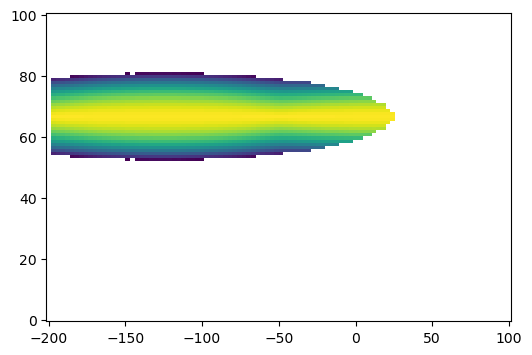

In [29]:
fig,ax = plt.subplots(figsize=(6,4))
ax.pcolormesh(X,Y,Color,norm=mcolors.LogNorm())
#ax.set_xlim(0,100)